## Импорты необходимых библиотек

In [10]:
import pandas as pd

from database.methods import (
    delete_exam_numbers,
    get_problems_by_exam_number,
)
from specifiers import informatics_specifier_2024
from specifiers.subject_specifiers import informatics_content_codifier_theme_ids

# Функции для распределения задач из банка по их номерам
from utils import (
    create_cluster_id_to_exam_number_dict,
    get_theme_df,
    print_and_get_theme_clustered_df,
    print_theme_problem_condition,
    set_exam_number,
    set_exam_number_from_clustered_df,
)

Соотнесение номеров задач и их кодов проверяемых элементов содержания (по кодификатору)

In [11]:
for problem in informatics_specifier_2024.problems:
    print(f"{problem.exam_number}:\t{', '.join(problem.content_codifier_theme_ids)}")

1:	2.10
2:	2.7
3:	4.5
4:	2.1
5:	3.3
6:	3.3
7:	2.6
8:	2.2
9:	4.2
10:	4.6
11:	2.2
12:	3.3
13:	1.2
14:	2.3
15:	2.7
16:	3.7
17:	3.10
18:	4.5
19:	2.15
20:	2.15
21:	2.15
22:	1.1
23:	3.3
24:	3.9
25:	3.4
26:	3.10
27:	3.2, 3.16


In [12]:
GIA_TYPE = informatics_specifier_2024.gia_type
SUBJECT_NAME = informatics_specifier_2024.subject_name

### Коды проверяемых элементов содержания, относящиеся к нескольким номерам заданий

In [13]:
flat_array = [
    item
    for sublist in informatics_content_codifier_theme_ids
    for item in (sublist if isinstance(sublist, list) else [sublist])
]

element_indices = {}
for idx, element in enumerate(flat_array):
    if element not in element_indices:
        element_indices[element] = [idx + 1]
    else:
        element_indices[element].append(idx + 1)

for element, indices in element_indices.items():
    if len(indices) > 1:
        print(
            f'Код проверяемого элемента содержания "{element}" встречается '
            f"{len(indices)} раз(а) в задачах под номерами: {indices}. "
            f"Количество задач в банке: {len(await get_theme_df(element))}"
        )

Код проверяемого элемента содержания "2.7" встречается 2 раз(а) в задачах под номерами: [2, 15]. Количество задач в банке: 0
Код проверяемого элемента содержания "4.5" встречается 2 раз(а) в задачах под номерами: [3, 18]. Количество задач в банке: 0
Код проверяемого элемента содержания "3.3" встречается 4 раз(а) в задачах под номерами: [5, 6, 12, 23]. Количество задач в банке: 0
Код проверяемого элемента содержания "2.2" встречается 2 раз(а) в задачах под номерами: [8, 11]. Количество задач в банке: 0
Код проверяемого элемента содержания "3.10" встречается 2 раз(а) в задачах под номерами: [17, 26]. Количество задач в банке: 0
Код проверяемого элемента содержания "2.15" встречается 3 раз(а) в задачах под номерами: [19, 20, 21]. Количество задач в банке: 0


In [14]:
await delete_exam_numbers()

# Классификация заданий в базе данных по их номерам

Будем обозначать устаревшие задания их номером в экзамене, умноженным на $-1$ (например, устаревшие задачи типа "$2$" будем обозначать как "$-2$").

# Задачи, темы кодификатора которых не встречаются в других задачах

### Номер 1

In [15]:
informatics_content_codifier_theme_ids[0]

'2.10'

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 231.25it/s]


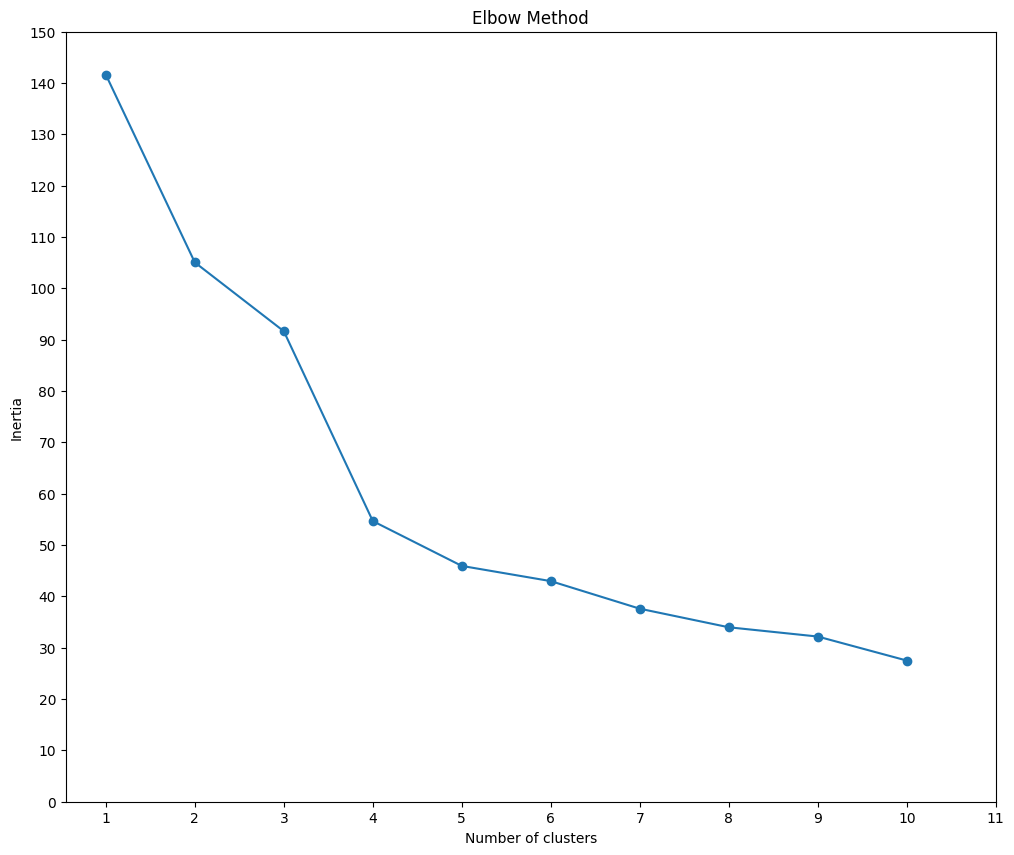

Number of problems in clusters: {2: 66, 1: 58, 3: 52, 0: 15}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=A8DF4F: Впишите правильный ответ.На рисунке изображена схема дорогN-ского района. В таблице звёздочкой обозначено наличие дороги из одного населённого пункта в другой. Отсутствие звёздочки означает, что такой дороги нет.Номер пункта1234567Номер пункта1***2***3******4**5***6**7***Каждому населённому пункту на схеме соответствует номер в таблице, но неизвестно, какой именно номер. Определите, какие номера в таблице могут соответствовать населённым пунктамCиEна схеме. В ответе запишите эти два номерав возрастающем порядке без пробелов и знаков препинания.
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=89D1F9: Впишите правильный ответ.На рисунке слева изображена схема дорог Н-ского района, в таблице звёздочкой обозначено наличие дороги из одного населённого пункта в другой. Отсутствие з

In [16]:
clustered_df1 = await print_and_get_theme_clustered_df("2.10", optimal_n_clusters=4)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $0, 1, 2$
- Не актуальные: $3$

In [17]:
cluster_id_to_exam_number_1 = create_cluster_id_to_exam_number_dict(
    1, actual_cluster_ids=[0, 1, 2], outdated_cluster_ids=[3]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df1, cluster_id_to_exam_number=cluster_id_to_exam_number_1
)

Set "1" exam number to 15 problems.
Set "1" exam number to 58 problems.
Set "1" exam number to 66 problems.
Set "-1" exam number to 52 problems.


### Номер 4

In [18]:
informatics_content_codifier_theme_ids[3]

'2.1'

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 235.87it/s]


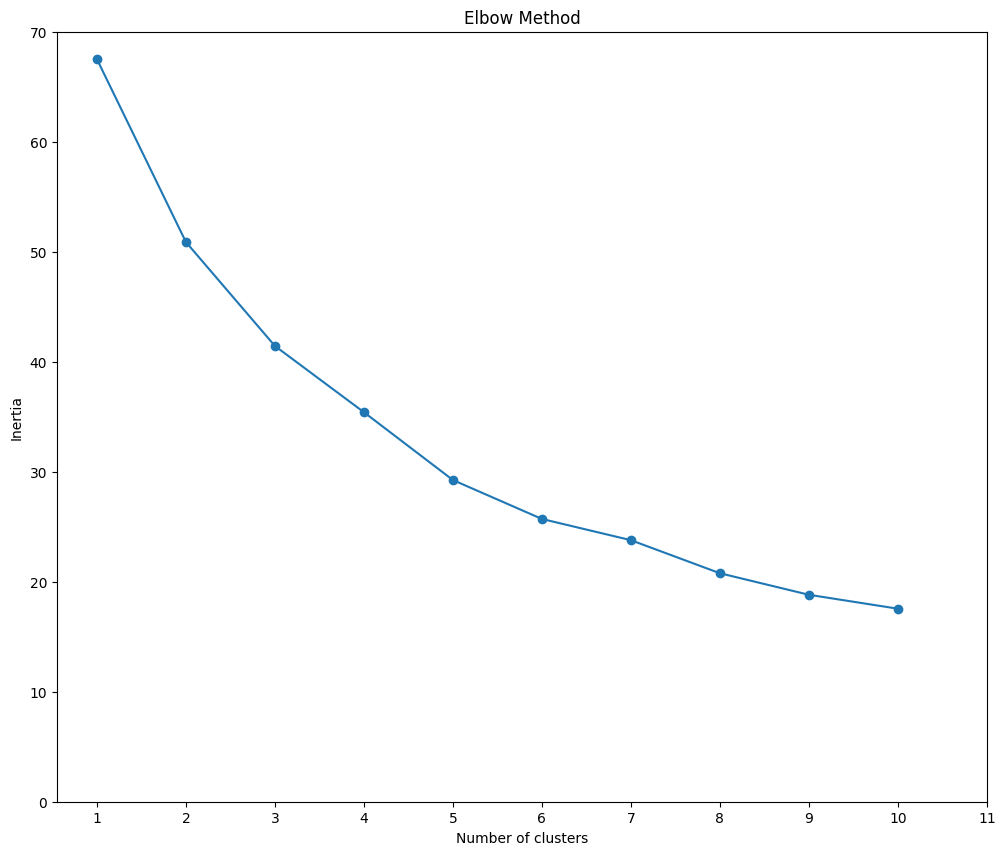

Number of problems in clusters: {1: 40, 0: 14, 4: 13, 3: 13, 2: 10}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=B44A04: Впишите правильный ответ.Сколько существует натуральных чиселx, для которых выполняется неравенство 100110112<x< 100111112?В ответе укажите только количество чисел, сами числа писать не нужно.
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=9EE305: Впишите правильный ответ.Сколько существует натуральных чиселx, для которых выполняется неравенствоD716<x<DF16?В ответе укажите только количество чисел, сами числа писать не нужно.
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=533671: Впишите правильный ответ.Сколько существует натуральных чиселx, для которых выполняется неравенство 101101112<x< 101111112?В ответе укажите только количество чисел, сами числа писать не нужно.
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA

In [19]:
clustered_df4 = await print_and_get_theme_clustered_df("2.1", optimal_n_clusters=5)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $1, 4$
- Не актуальные: $0, 2, 3$

In [20]:
cluster_id_to_exam_number_4 = create_cluster_id_to_exam_number_dict(
    4, actual_cluster_ids=[1, 4], outdated_cluster_ids=[0, 2, 3]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df4, cluster_id_to_exam_number=cluster_id_to_exam_number_4
)

Set "-4" exam number to 14 problems.
Set "4" exam number to 40 problems.
Set "-4" exam number to 10 problems.
Set "-4" exam number to 13 problems.
Set "4" exam number to 13 problems.


### Номер 7

In [21]:
informatics_content_codifier_theme_ids[6]

'2.6'

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 199.99it/s]


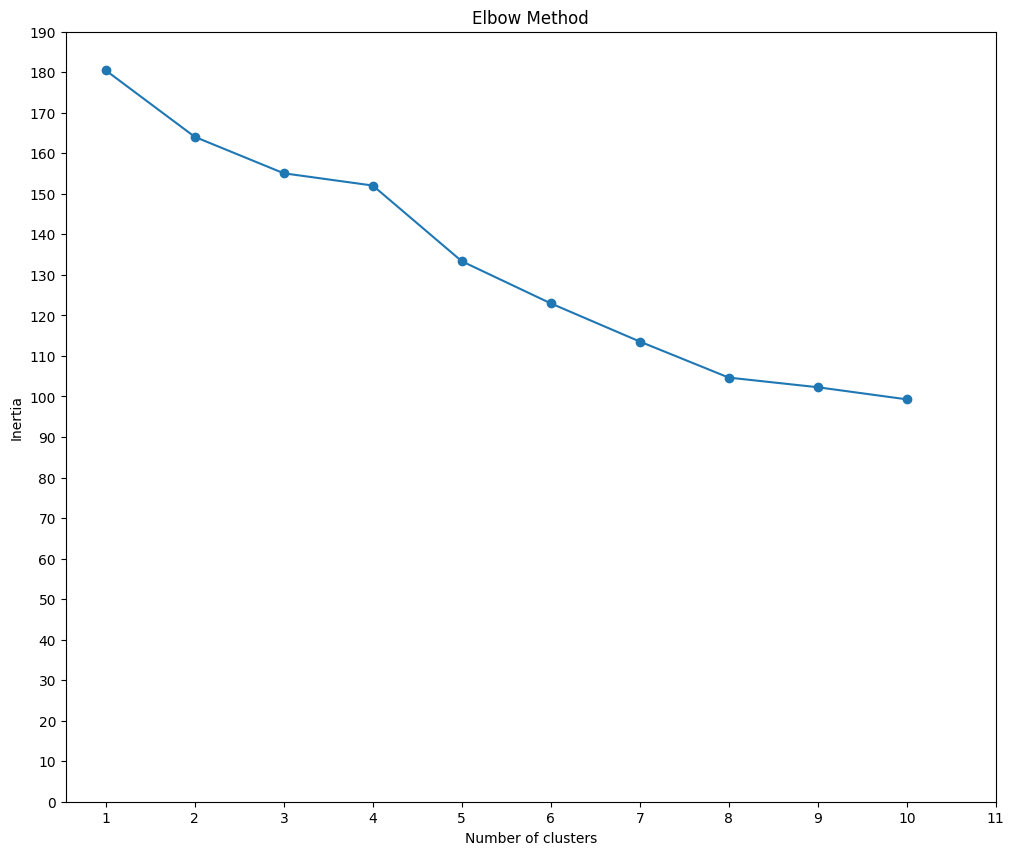

Number of problems in clusters: {1: 49, 2: 43, 6: 30, 3: 23, 8: 17, 7: 13, 4: 12, 5: 11, 0: 10}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=8AEE04: Выберите правильный ответ.Световое табло состоит из лампочек, каждая из которых может находиться в двух состояниях («включено» или «выключено»). Какое наименьшее количество лампочек должно находиться на табло, чтобы с его помощью можно было передать 100 различных сигналов?1)62)73)504)100
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=06F4A9: Выберите правильный ответ.Световое табло состоит из лампочек, каждая из которых может находиться в двух состояниях («включено» или «выключено»). Какое наименьшее количество лампочек должно находиться на табло, чтобы с его помощью можно было передать 200 различных сигналов?1)82)93)1004)200
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=28C6AB: Выберите правильны

/home/zubec/dev/FipiBankClassification/utils/__main__.py:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html, features="html.parser")


In [22]:
clustered_df7 = await print_and_get_theme_clustered_df("2.6", optimal_n_clusters=9)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $0, 1, 2, 3, 5, 7$
- Не актуальные: $4, 6, 8$

In [23]:
cluster_id_to_exam_number_7 = create_cluster_id_to_exam_number_dict(
    7, actual_cluster_ids=[0, 1, 2, 3, 5, 7], outdated_cluster_ids=[4, 6, 8]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df7, cluster_id_to_exam_number=cluster_id_to_exam_number_7
)

Set "7" exam number to 10 problems.
Set "7" exam number to 49 problems.
Set "7" exam number to 43 problems.
Set "7" exam number to 23 problems.
Set "-7" exam number to 12 problems.
Set "7" exam number to 11 problems.
Set "-7" exam number to 30 problems.
Set "7" exam number to 13 problems.
Set "-7" exam number to 17 problems.


### Номер 9

In [24]:
informatics_content_codifier_theme_ids[8]

'4.2'

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 228.87it/s]


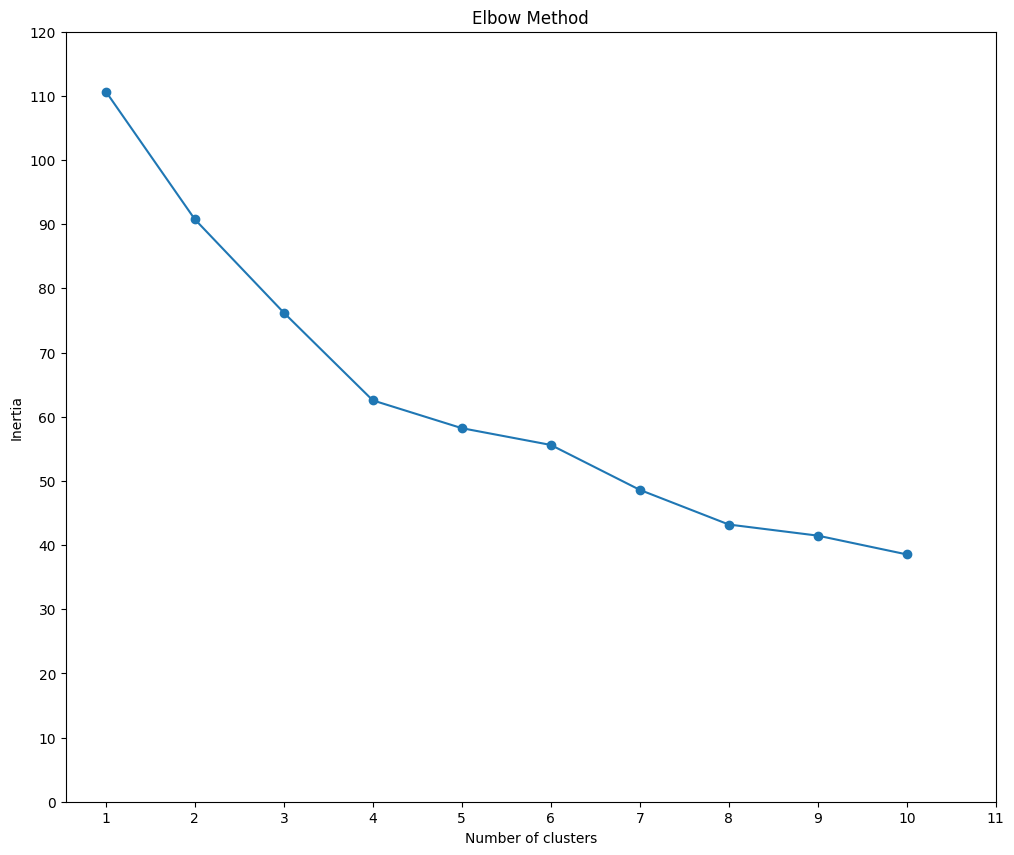

Number of problems in clusters: {1: 31, 3: 31, 4: 30, 2: 26, 0: 11, 5: 2}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=B9BE47: Впишите правильный ответ.Задание выполняется с использованием прилагаемых файлов.Откройте файл электронной таблицы, содержащей в каждой строке пять натуральных чисел. Определите количество строк таблицы, в которых квадрат суммы максимального и минимального чисел в строке больше суммы квадратов трёх оставшихся.
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=DF08FE: Впишите правильный ответ.Задание выполняется с использованием прилагаемых файлов.Откройте файл электронной таблицы, содержащей в каждой строке пять натуральных чисел. Определите количество строк таблицы, содержащих числа, для которых выполнены оба условия:– в строке все числа различны;– удвоенная сумма максимального и минимального чисел строки не больше суммы оставшихся трёх её чисел.В ответе запишите 

In [25]:
clustered_df9 = await print_and_get_theme_clustered_df("4.2", optimal_n_clusters=6)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $0, 1, 4, 5$, причём кластер $1$ - задачи типа $18$, а кластер $5$ - задачи типа $26$
- Не актуальные: $2, 3$

In [26]:
cluster_id_to_exam_number_9 = (
    create_cluster_id_to_exam_number_dict(
        9, actual_cluster_ids=[0, 4], outdated_cluster_ids=[2, 3]
    )
    | create_cluster_id_to_exam_number_dict(18, [1], [])
    | create_cluster_id_to_exam_number_dict(26, [5], [])
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df9, cluster_id_to_exam_number=cluster_id_to_exam_number_9
)

Set "9" exam number to 11 problems.
Set "18" exam number to 31 problems.
Set "-9" exam number to 26 problems.
Set "-9" exam number to 31 problems.
Set "9" exam number to 30 problems.
Set "26" exam number to 2 problems.


### Номер 10

In [27]:
informatics_content_codifier_theme_ids[9]

'4.6'

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 203.64it/s]


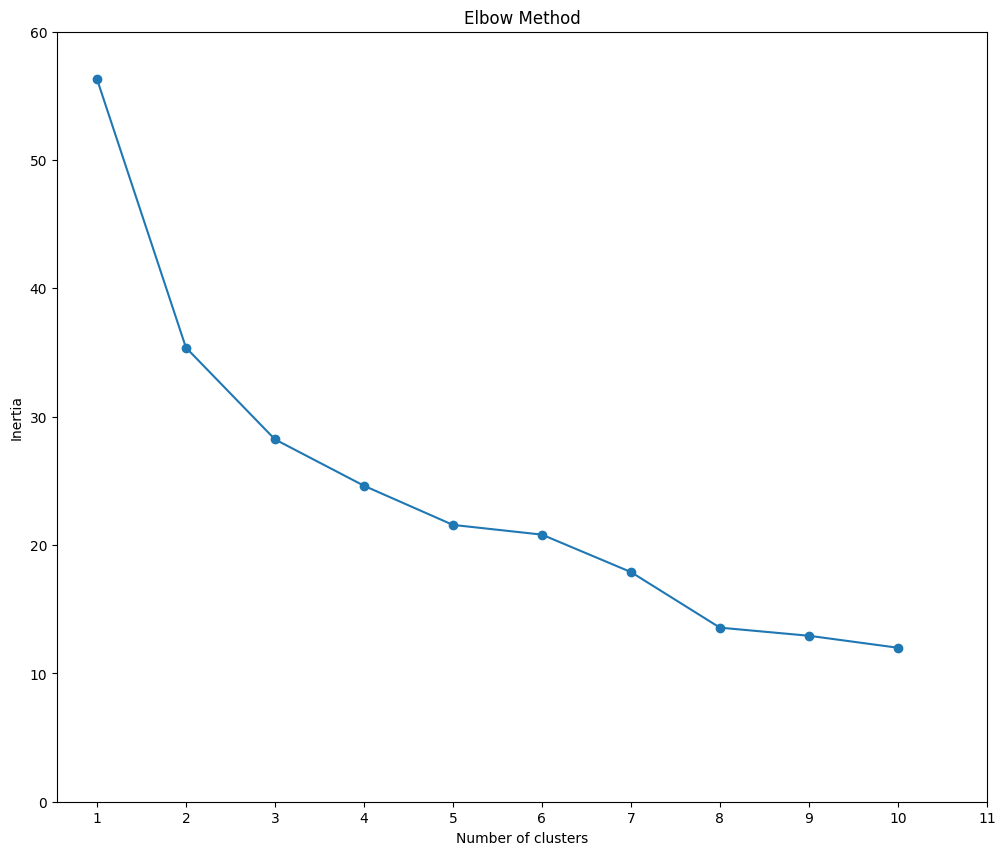

Number of problems in clusters: {1: 32, 0: 15, 2: 15, 3: 9, 4: 7}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=EBA2F3: Впишите правильный ответ.Текст романа Александра Грина «Бегущая по волнам» представлен в виде файлов различных форматов. Откройте один из файлов и определите, сколько раз встречаются в тексте слова с сочетанием букв «круг», например «вокруг», «круглый». Отдельные слова «круг» и «Круг» учитывать не следует.В ответе запишите только число.
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=8B2678: Впишите правильный ответ.Текст романа Александра Грина «Бегущая по волнам» представлен в виде файлов различных форматов. Откройте один из файлов и определите, сколько раз встречаются в тексте слова с сочетанием букв «тон», например «Тонна», «камертон», «тональность». Отдельные слова «тон» и «Тон» учитывать не следует.В ответе запишите только число.
https://ege.fipi.ru/bank/questions.

In [28]:
clustered_df10 = await print_and_get_theme_clustered_df("4.6", optimal_n_clusters=5)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $0, 2, 3, 4$
- Не актуальные: $1$

In [29]:
cluster_id_to_exam_number_10 = create_cluster_id_to_exam_number_dict(
    9, actual_cluster_ids=[0, 2, 3, 4], outdated_cluster_ids=[1]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df10, cluster_id_to_exam_number=cluster_id_to_exam_number_10
)

Set "9" exam number to 15 problems.
Set "-9" exam number to 32 problems.
Set "9" exam number to 15 problems.
Set "9" exam number to 9 problems.
Set "9" exam number to 7 problems.


### Номер 13

In [30]:
informatics_content_codifier_theme_ids[12]

'1.2'

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 218.68it/s]


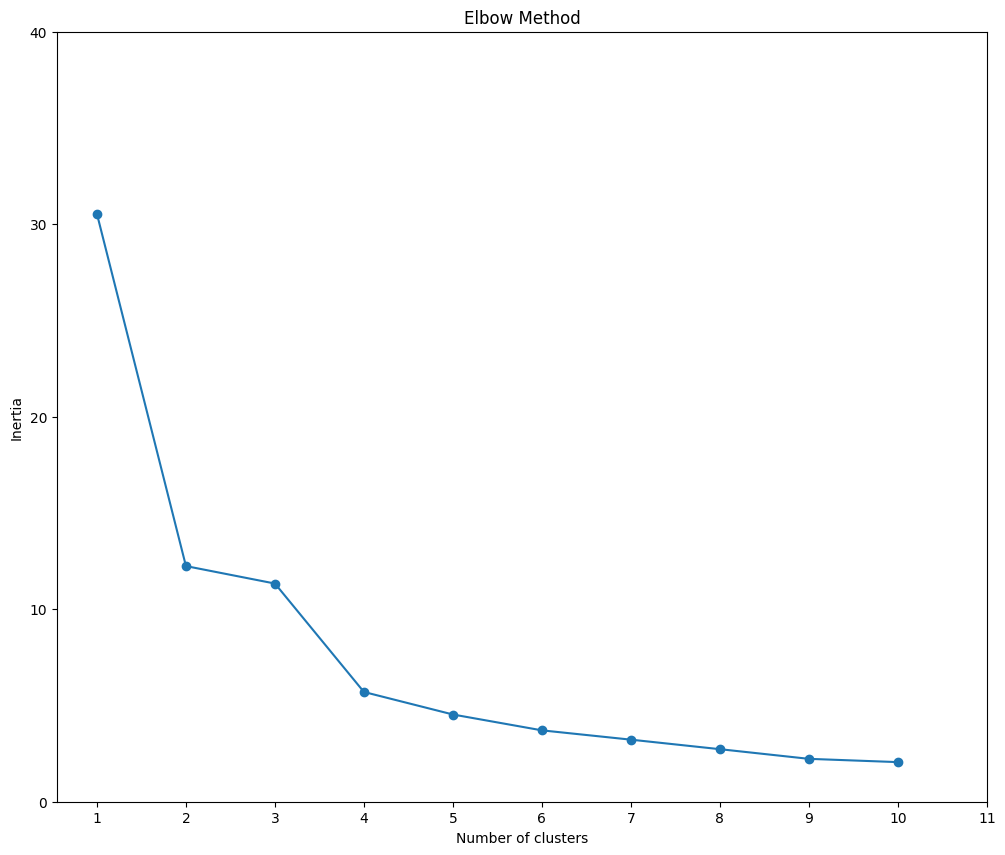

Number of problems in clusters: {0: 23, 1: 18, 2: 6, 3: 4}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=403FFC: Впишите правильный ответ.В терминологии сетей TCP/IP маской сети называется двоичное число, определяющее, какая часть IP-адреса узла сети относится к адресу сети,а какая–к адресу самого узла в этой сети. Обычно маска записываетсяпо тем же правилам, что иIP-адрес,–в виде четырёх байтов, причём каждый байт записывается в виде десятичного числа. При этом в маске сначала(в старших разрядах) стоят единицы, а затем с некоторого разряда–нули. Адрес сети получается в результате применения поразрядной конъюнкциик заданномуIP-адресу узла и маске.Например, еслиIP-адрес узла равен 231.32.255.131, а маска равна 255.255.240.0, то адрес сети равен 231.32.240.0.Для узла сIP-адресом 117.191.176.37 адрес сети равен 117.191.160.0. Чему равен третий слева байт маски? Ответ запишите в виде десятичного числа.
https://ege.fipi.ru/bank/questi

In [31]:
clustered_df13 = await print_and_get_theme_clustered_df("1.2", optimal_n_clusters=4)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $0, 1, 2, 3$, причём кластер $1$ - задачи типа $22$

In [32]:
cluster_id_to_exam_number_13 = create_cluster_id_to_exam_number_dict(
    13, actual_cluster_ids=[0, 2, 3], outdated_cluster_ids=[]
) | create_cluster_id_to_exam_number_dict(22, [1], [])
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df13, cluster_id_to_exam_number=cluster_id_to_exam_number_13
)

Set "13" exam number to 23 problems.
Set "22" exam number to 18 problems.
Set "13" exam number to 6 problems.
Set "13" exam number to 4 problems.


## Номер 14

In [33]:
informatics_content_codifier_theme_ids[13]

'2.3'

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 249.49it/s]


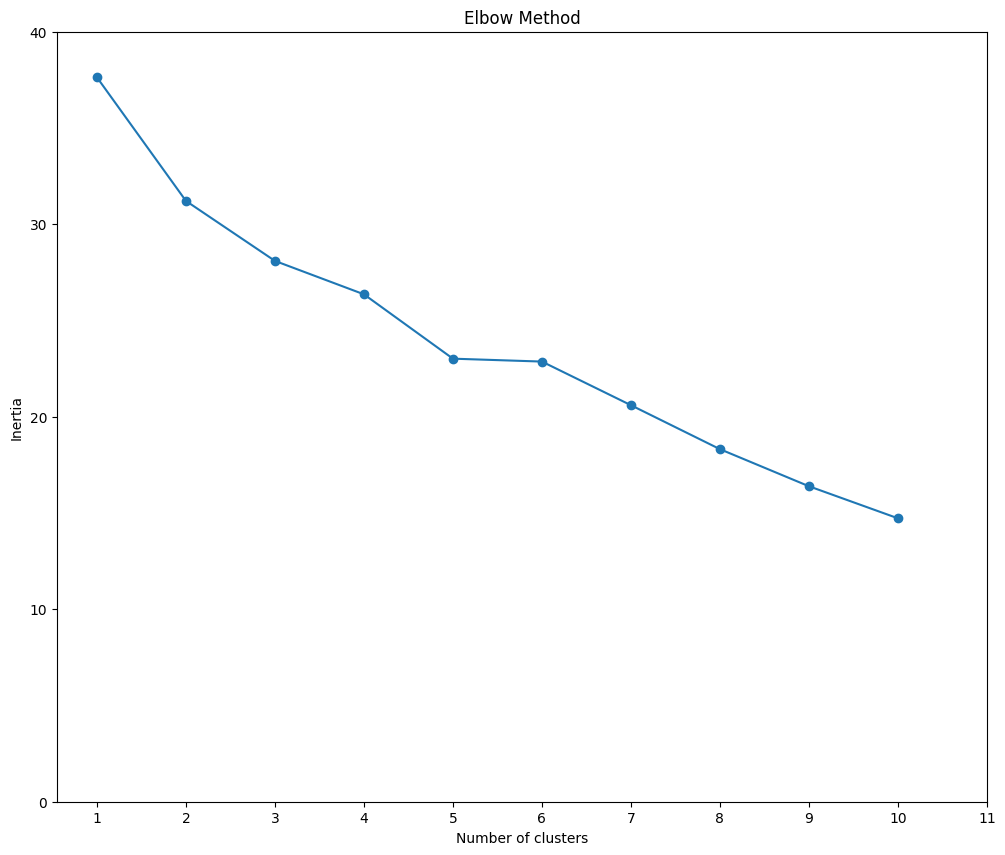

Number of problems in clusters: {4: 30, 1: 12, 0: 9, 2: 3, 3: 2}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=AE42F9: Впишите правильный ответ.Операнды арифметического выражения записаны в системе счисления с основанием 19.98897x2119+ 2x92319В записи чисел переменнойxобозначена неизвестная цифра из алфавита 19-ричной системы счисления. Определите наибольшее значениеx, при котором значение данного арифметического выражения кратно 18. Для найденногоxвычислите частное от деления значения арифметического выражения на 18 и укажите его в ответе в десятичной системе счисления. Основание системы счисления указывать не нужно.
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=217C79: Впишите правильный ответ.Операнды арифметического выражения записаны в системе счисления с основанием 19.98x7973119+ 36x1419В записи чисел переменнойxобозначена неизвестная цифра из алфавита 19-ричной системы счисления.

In [34]:
clustered_df14 = await print_and_get_theme_clustered_df("2.3", optimal_n_clusters=5)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $0$
- Не актуальные: $1, 2, 3, 4$

In [35]:
cluster_id_to_exam_number_14 = create_cluster_id_to_exam_number_dict(
    14, actual_cluster_ids=[0], outdated_cluster_ids=[1, 2, 3, 4]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df14, cluster_id_to_exam_number=cluster_id_to_exam_number_14
)

Set "14" exam number to 9 problems.
Set "-14" exam number to 12 problems.
Set "-14" exam number to 3 problems.
Set "-14" exam number to 2 problems.
Set "-14" exam number to 30 problems.


## Номер 16

In [36]:
informatics_content_codifier_theme_ids[15]

'3.7'

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 238.26it/s]


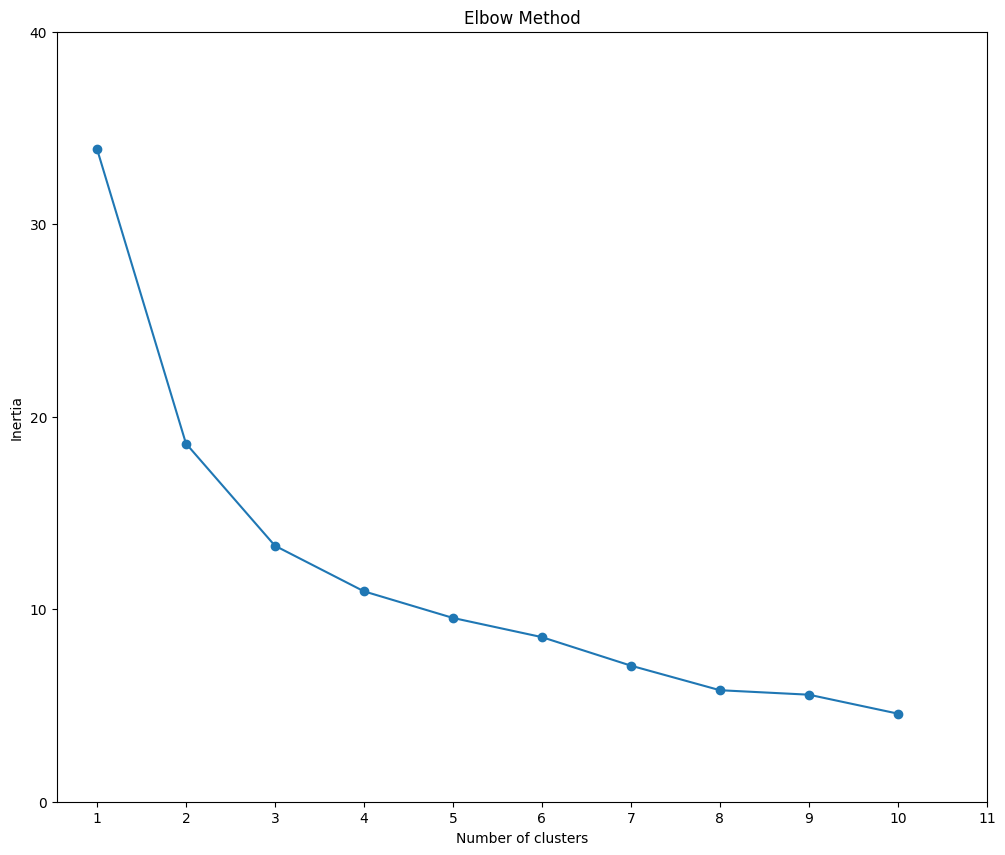

Number of problems in clusters: {2: 23, 1: 22, 0: 6}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=9DAE40: Впишите правильный ответ.Ниже на пяти языках программирования записаны две рекурсивные функции (процедуры): F и G.БейсикPythonDECLARE SUB F(n)DECLARE SUB G(n)SUB F(n)IF n > 0 THENG(n - 1)END SUBSUB G(n)PRINT "*"IF n > 1 THENF(n - 3)END SUBdef F(n):ifn > 0:G(n - 1)def G(n):print("*")ifn > 1:F(n - 3)Алгоритмический языкПаскальалгF(целn)начеслиn > 0тоG(n - 1)всеконалгG(целn)начвывод"*"еслиn > 1тоF(n - 3)всеконprocedure F(n: integer); forward;procedure G(n: integer); forward;procedure F(n: integer);beginif n > 0 thenG(n - 1);end;procedure G(n: integer);beginwriteln('*');if n > 1 thenF(n - 3);end;Сиvoid F(int n);void G(int n);void F(int n){if (n > 0)G(n - 1);}void G(int n){printf("*");if (n > 1)F(n - 3);}Сколько символов «звёздочка» будет напечатано на экране при выполнении вызова F(18)?
https://ege.fipi.ru/bank/questions.php?sea

In [37]:
clustered_df16 = await print_and_get_theme_clustered_df("3.7", optimal_n_clusters=3)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $1$
- Не актуальные: $0, 2$

In [38]:
cluster_id_to_exam_number_16 = create_cluster_id_to_exam_number_dict(
    16, actual_cluster_ids=[1], outdated_cluster_ids=[0, 2]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df16, cluster_id_to_exam_number=cluster_id_to_exam_number_16
)

Set "-16" exam number to 6 problems.
Set "16" exam number to 22 problems.
Set "-16" exam number to 23 problems.


## Номер 22

In [39]:
informatics_content_codifier_theme_ids[21]

'1.1'

Clustering progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 195.77it/s]


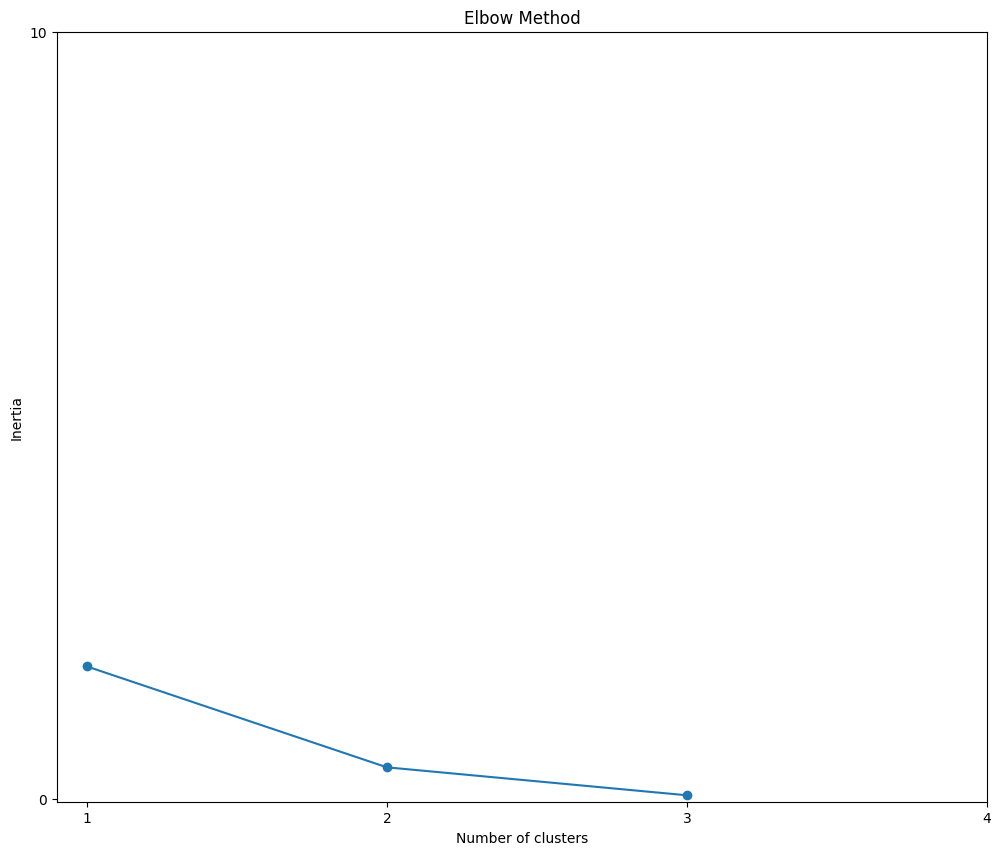

Number of problems in clusters: {0: 4}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=BC4219: Выберите правильный ответ.В некотором каталоге хранился файлПушкин.doc. После того, как в этом каталоге создали подкаталог и переместили в созданный подкаталог файлПушкин.doc, полное имя файла сталоF:\Литература\Поэты\XIX\Пушкин.doc. Каково имя вновь созданного каталога?1)Поэты2)F:\Литература3)XIX4)Литература
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=E55B5F: Выберите правильный ответ.Перемещаясь из одного каталога в другой, пользователь последовательно посетил каталогиDOC,USER,SCHOOL,A:\,LETTER,INBOX.При каждом перемещении пользователь либо спускался в каталог на уровень ниже, либо поднимался на уровень выше. Каково полное имя каталога, из которого начал перемещение пользователь?1)A:\DOC2)A:\ LETTER\INBOX3)А:\SCHOOL\USER\DOC4)А:\DOC\USER\SCHOOL
https://ege.fipi.ru/bank/questions.php?search=1

In [40]:
clustered_df22 = await print_and_get_theme_clustered_df("1.1", optimal_n_clusters=1)

Актуальность типов задач по номерам их кластеров:
- Не актуальные: $0$

In [41]:
cluster_id_to_exam_number_22 = create_cluster_id_to_exam_number_dict(
    22, actual_cluster_ids=[], outdated_cluster_ids=[0]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df22, cluster_id_to_exam_number=cluster_id_to_exam_number_22
)

Set "-22" exam number to 4 problems.


## Номер 24

In [42]:
informatics_content_codifier_theme_ids[23]

'3.9'

Clustering progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 285.55it/s]


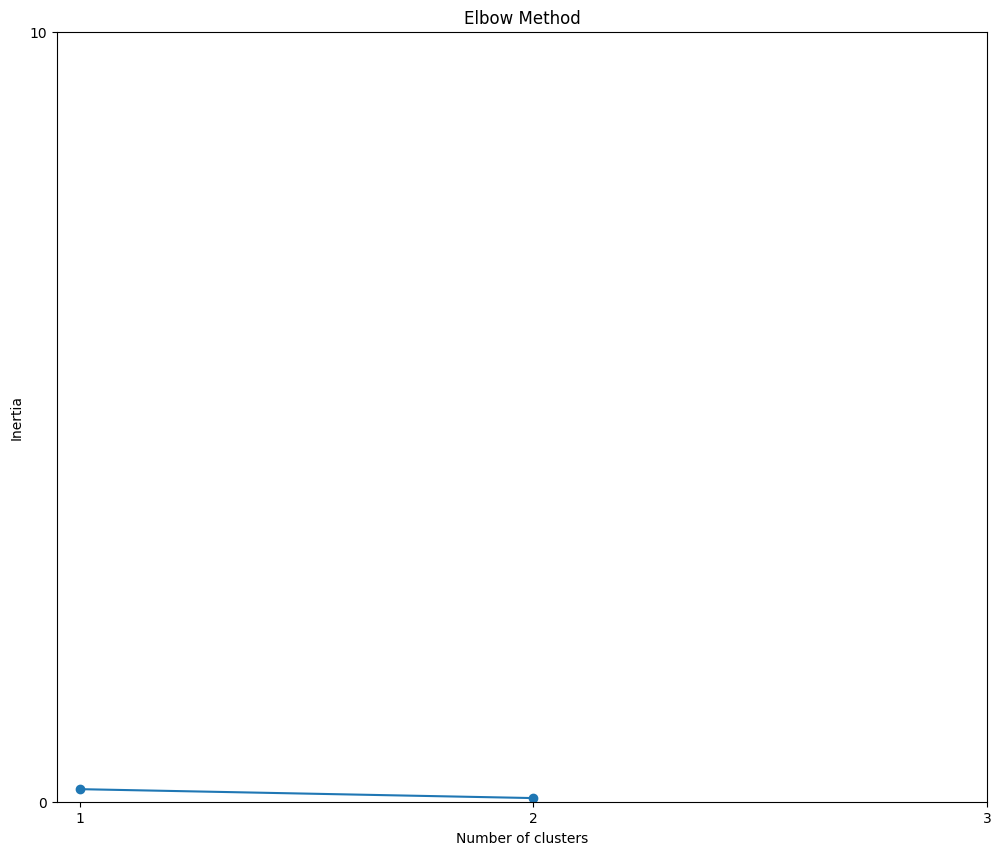

Number of problems in clusters: {0: 3}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=C6537B: Выберите правильный ответ.Определите значение целочисленных переменныхaиbпосле выполнения фрагмента программы:БейсикПаскальАлгоритмическийa = 1075b = (a MOD 1000)*10a = a+(b \ 100)'\ и MOD – операции, вычисляющие результат деления нацело первого аргумента на второй и остаток от деления соответственноa:=1075;b:= (a mod 1000)*10;a:= a+(b div 100);{div и mod – операции, вычисляющие результат деления нацело первого аргумента на второй и остаток от деления соответственно}a:= 1075b:= mod(a,1000)*10a:= a+div(b,100)|div и mod – функции, вычисляющие результат деления нацело первого аргумента на второй и остаток от деления соответственно|1)a = 1150, b = 7502)a = 1082, b = 10703)a = 1082, b = 7504)a = 1085, b = 1070
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=29592C: Выберите правильный ответ.Определите 

In [43]:
clustered_df24 = await print_and_get_theme_clustered_df("3.9", optimal_n_clusters=1)

Актуальность типов задач по номерам их кластеров:
- Не актуальные: $0$

In [44]:
cluster_id_to_exam_number_24 = create_cluster_id_to_exam_number_dict(
    24, actual_cluster_ids=[], outdated_cluster_ids=[0]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df24, cluster_id_to_exam_number=cluster_id_to_exam_number_24
)

Set "-24" exam number to 3 problems.


## Номер 25

In [45]:
informatics_content_codifier_theme_ids[24]

'3.4'

Clustering progress: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 69.44it/s]


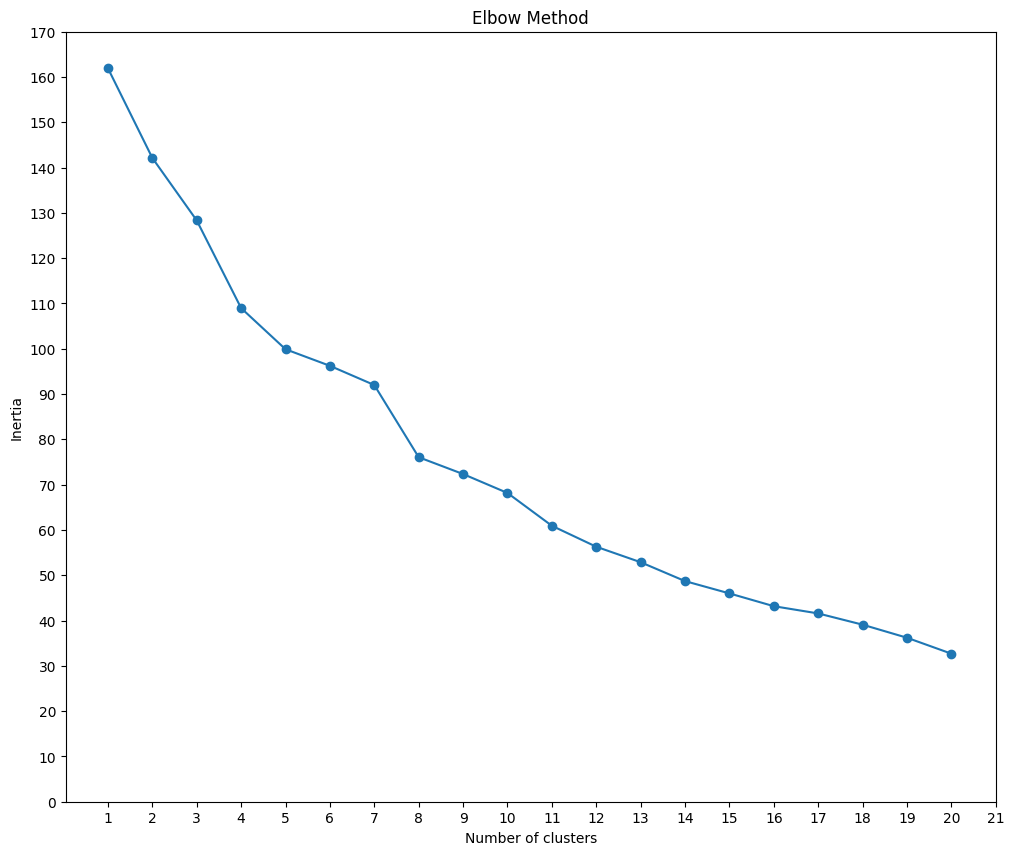

Number of problems in clusters: {0: 28, 1: 28, 4: 20, 3: 20, 2: 18, 7: 18, 8: 13, 6: 13, 10: 12, 5: 8, 9: 6}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=454C49: Впишите правильный ответ.В программе используется одномерный целочисленный массив A с индексами от 0 до 9. Значения элементов равны 4, 5, 3, 2, 1, 7, 8, 9, 9, 3 соответственно, т.е.A[0] = 4,A[1] = 5 и т.д.Определите значение переменнойcпосле выполнения следующего фрагмента этой программы, записанного ниже на пяти языках программирования.БейсикPythonc = 0FOR i = 1 TO 9IF A(i-1) < A(i) THENc = c + 1t = A(i)A(i) = A(i-1)A(i-1) = tEND IFNEXT ic = 0for i in range(1, 10):if A[i-1] < A[i]:c = c + 1A[i-1], A[i] = A[i], A[i-1]Алгоритмический языкПаскальc:= 0нцдляiот1до9еслиA[i-1] < A[i]тоc := c + 1t := A[i]A[i] := A[i-1]A[i-1] := tвсекцc := 0;for i := 1 to 9 doif A[i-1] < A[i] thenbeginc := c + 1;t := A[i];A[i] := A[i-1];A[i-1] := t;end;С++c = 0;for (int i = 1; i < 10; i++)if (A

In [46]:
clustered_df25 = await print_and_get_theme_clustered_df(
    "3.4", max_n_clusters=20, optimal_n_clusters=11
)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $3, 4, 7$, причём кластер $4$ - задачи типа $16$, а кластер $7$ - задачи типа $27$
- Не актуальные: $0, 1, 2, 5, 6, 8, 9, 10$

In [47]:
cluster_id_to_exam_number_25 = (
    create_cluster_id_to_exam_number_dict(
        25, actual_cluster_ids=[3], outdated_cluster_ids=[0, 1, 2, 5, 6, 8, 9, 10]
    )
    | create_cluster_id_to_exam_number_dict(16, [4], [])
    | create_cluster_id_to_exam_number_dict(27, [7], [])
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df25, cluster_id_to_exam_number=cluster_id_to_exam_number_25
)

Set "-25" exam number to 28 problems.
Set "-25" exam number to 28 problems.
Set "-25" exam number to 18 problems.
Set "25" exam number to 20 problems.
Set "16" exam number to 20 problems.
Set "-25" exam number to 8 problems.
Set "-25" exam number to 13 problems.
Set "27" exam number to 18 problems.
Set "-25" exam number to 13 problems.
Set "-25" exam number to 6 problems.
Set "-25" exam number to 12 problems.


## Номер 27

In [48]:
informatics_content_codifier_theme_ids[26]

['3.2', '3.16']

Clustering progress: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 71.26it/s]


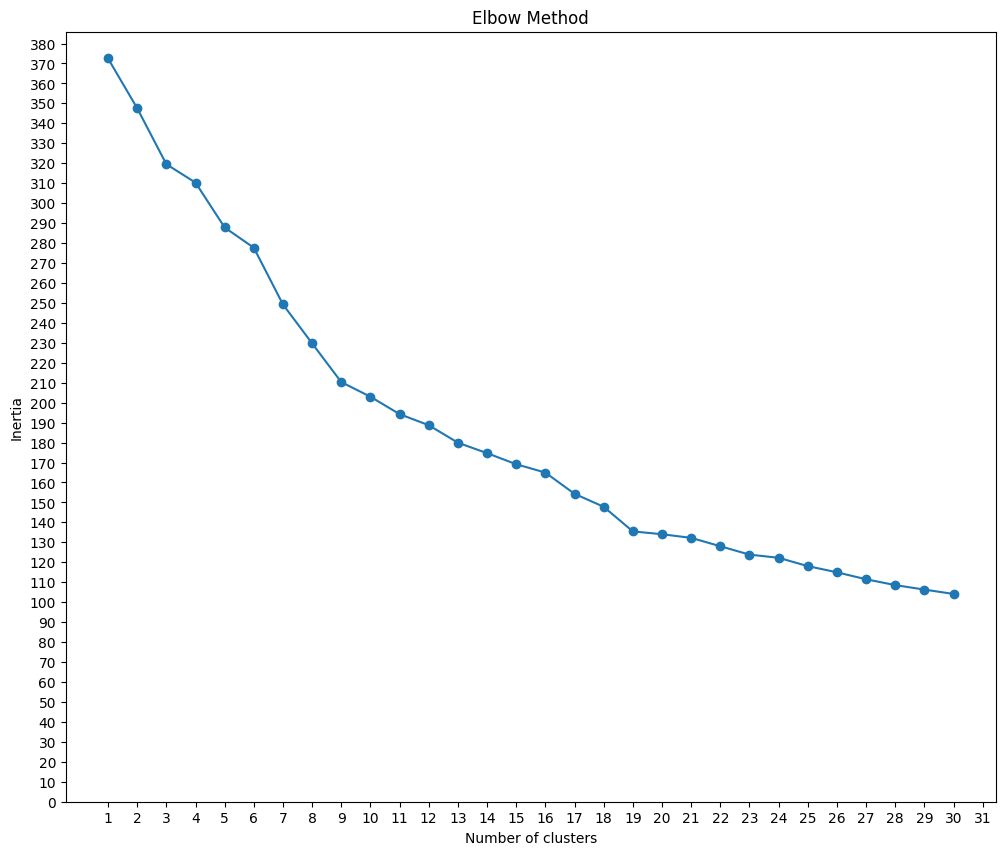

Number of problems in clusters: {1: 53, 5: 45, 3: 44, 4: 28, 2: 28, 18: 24, 6: 24, 17: 24, 13: 22, 8: 20, 16: 17, 9: 16, 7: 15, 14: 13, 10: 8, 12: 7, 0: 6, 15: 6, 11: 6}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=07474E: Дайте развернутый ответ.Два игрока, Петя и Ваня, играют в следующую игру. У игроков есть табличка, на которой записана  пара неотрицательных целых чисел. Будем называть эту пару чисел позицией.  Игроки ходят по очереди, первый ход делает Петя. За один ход игрок должен заменить одно из чисел пары  по своему выбору на сумму обоих чисел. Так, например, если перед ходом игрока была позиция (7, 20), то после его хода будет  позиция  (27, 20) или(7, 27).Игра завершается в тот момент, когда сумма чисел пары становитсяне менее 29. Победителем считается игрок, сделавший последний ход,т.е. первым получивший такую пару, в которой сумма её чисел сталане менее 29.Будем говорить, что игрок имеетвыигрышную стратегию, если он

In [49]:
clustered_df27 = await print_and_get_theme_clustered_df(
    "3.2", max_n_clusters=30, optimal_n_clusters=19
)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $—$
- Не актуальные: $2, 7, 9, 10, 11, 13, 14, 15, 16, 17$
- Актуальные, но относятся к другим типам (номер кластера — тип задания): 0 и 3 — 19, 1 — 16, 4 — 24, 5 — 12, 6 — 20, 8 и 12 — 6, 18 — 21

In [50]:
cluster_id_to_exam_number_27 = create_cluster_id_to_exam_number_dict(
    27, actual_cluster_ids=[], outdated_cluster_ids=[2, 7, 9, 10, 11, 13, 14, 15, 16, 17]
)
for cluster_ids, exam_number in (
    ((0, 3), 19),
    ((1,), 16),
    ((4,), 24),
    ((5,), 12),
    ((6,), 20),
    ((8, 12), 6),
    ((18,), 21),
):
    cluster_id_to_exam_number_27 = (
        cluster_id_to_exam_number_27
        | create_cluster_id_to_exam_number_dict(
            exam_number=exam_number, actual_cluster_ids=cluster_ids, outdated_cluster_ids=[]
        )
    )
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df27, cluster_id_to_exam_number=cluster_id_to_exam_number_27
)

Set "19" exam number to 6 problems.
Set "16" exam number to 53 problems.
Set "-27" exam number to 28 problems.
Set "19" exam number to 44 problems.
Set "24" exam number to 28 problems.
Set "12" exam number to 45 problems.
Set "20" exam number to 24 problems.
Set "-27" exam number to 15 problems.
Set "6" exam number to 20 problems.
Set "-27" exam number to 16 problems.
Set "-27" exam number to 8 problems.
Set "-27" exam number to 6 problems.
Set "6" exam number to 7 problems.
Set "-27" exam number to 22 problems.
Set "-27" exam number to 13 problems.
Set "-27" exam number to 6 problems.
Set "-27" exam number to 17 problems.
Set "-27" exam number to 24 problems.
Set "21" exam number to 24 problems.


# Задачи, темы кодификатора которых встречаются в нескольких типах задач

### Номер 3 и номер 18

In [51]:
[informatics_content_codifier_theme_ids[exam_number - 1] for exam_number in [3, 18]]

['4.5', '4.5']

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 129.94it/s]


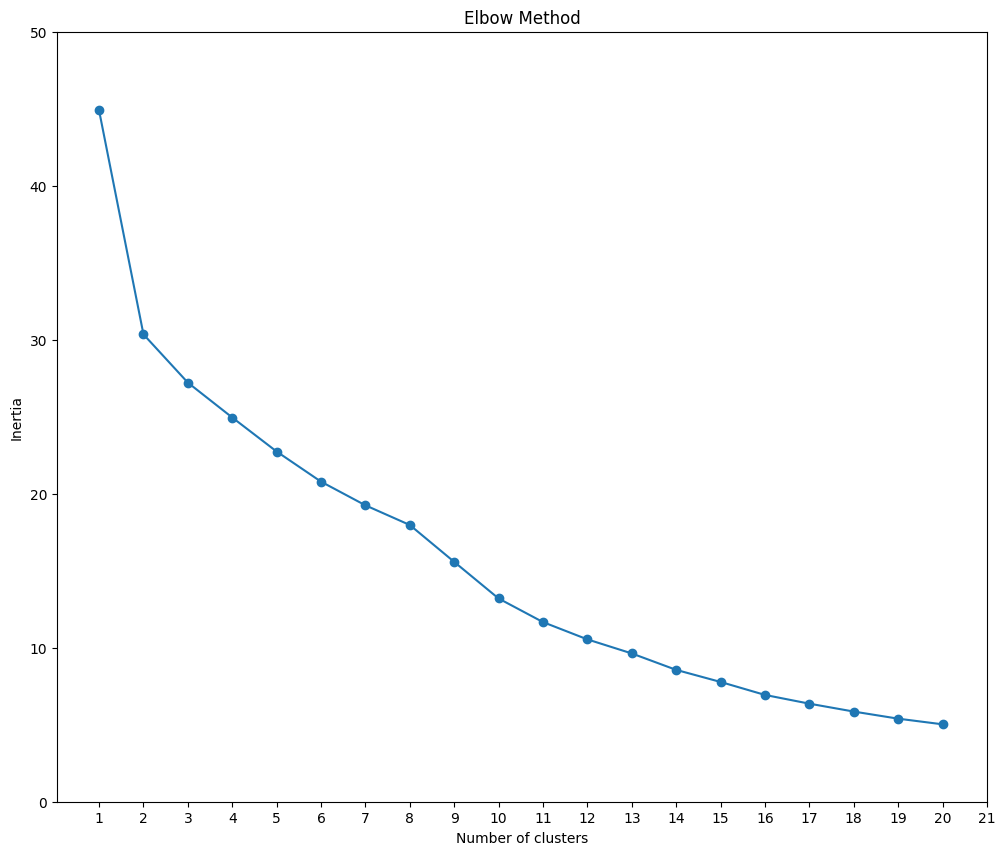

Number of problems in clusters: {0: 24, 1: 23, 2: 10, 3: 6}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=FDF14C: Впишите правильный ответ.Ниже представлены две таблицы из базы данных. Каждая строка таблицы 2 содержит информацию о ребёнке и об одном из его родителей. Информация представлена значением поля ID в соответствующей строке таблицы 1. Определите на основании приведённых данныхIDдедушки Аганян Б.Г.Примечание.Дедушка–это отец одного из родителей.Таблица 1Таблица 2IDФамилия_И.О.ПолID_РодителяID_Ребёнка16Дурново И.М.Ж262726Виеру А.В.М462727Виеру В.А.М272828Виеру В.В.М662836Аганян Т.А.Ж263637Аганян Б.Г.Ж463638Аганян Г.Г.М363746Баурн А.С.Ж383747Баурн В.А.М163848Альберт К.Г.Ж364849Альберт И.К.М384856Лещенко Н.В.Ж275666Чивадзе Г.В.Ж6656……………
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=4D9BF6: Выберите правильный ответ.База данных «Учащиеся» содержит поля:ПолеТипПримечаниеФамилиятекст

In [52]:
clustered_df_3_18 = await print_and_get_theme_clustered_df(
    "4.5", max_n_clusters=20, optimal_n_clusters=4
)

Актуальность типов задач по номерам их кластеров:
- Актуальные (номер 3): $1$
- Не актуальные: $0, 2, 3$

Нет задач типа $18$

In [53]:
cluster_id_to_exam_number_3_18 = create_cluster_id_to_exam_number_dict(
    3, actual_cluster_ids=[1], outdated_cluster_ids=[0, 2, 3]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df_3_18, cluster_id_to_exam_number=cluster_id_to_exam_number_3_18
)

Set "-3" exam number to 24 problems.
Set "3" exam number to 23 problems.
Set "-3" exam number to 10 problems.
Set "-3" exam number to 6 problems.


## Номера 5, 6, 12 и 23

In [54]:
[informatics_content_codifier_theme_ids[exam_number - 1] for exam_number in [5, 6, 12, 23]]

['3.3', '3.3', '3.3', '3.3']

In [55]:
clustered_df_5_6_12_23 = await get_theme_df("3.3")
clustered_df_5_6_12_23

,problem_id,url,condition_html
0,2089EA,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q2089EA""> \t <div i..."


Осталась только одна не типизированная задача среди задач с темой "3.3".

In [56]:
await print_theme_problem_condition(content_codifier_theme_id="3.3")

Theme 3.3; 1 problems:

Выберите правильный ответ.Определите значение целочисленных переменных a и b после выполнения фрагмента программы:БейсикПаскальАлгоритмическийa=2468b=(a MOD 1000)*10a=a\1000+b'\ и MOD — операции, вычисляющие результат деления нацело первого аргумента на второй и остаток от деления соответственноa:=2468;b:=(a mod 1000)*10;a:=a div 1000+b;{div и mod — операции, вычисляющие результат деления нацело первого аргумента на второй и остаток от деления соответственно}a:=2468b:=mod(a, 1000)*10a:=div(a, 1000)+b|div и mod — функции, вычисляющие результат деления нацело первого аргумента на второй и остаток от деления соответственно|1)a = 22,  b = 202)a = 4682,  b = 46803)a = 8246,  b = 2464)a = 470,  b = 468


In [57]:
await set_exam_number(problem_ids=["2089EA"], exam_number=-5)

Set "-5" exam number to 1 problems.


## Номера 8 и 11

In [58]:
[informatics_content_codifier_theme_ids[exam_number - 1] for exam_number in [8, 11]]

['2.2', '2.2']

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 269.63it/s]


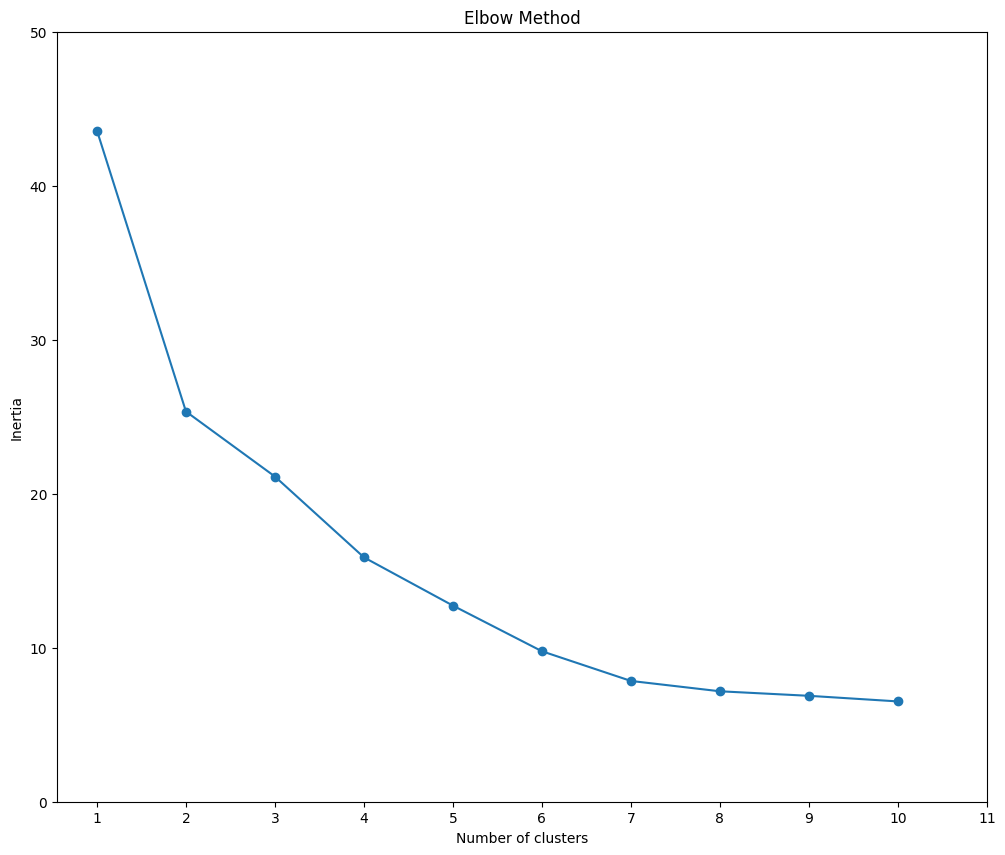

Number of problems in clusters: {1: 50, 2: 15, 3: 7, 0: 4}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=0F4A18: Впишите правильный ответ.Документ (без упаковки) можно передать по каналу связи с одного компьютера на другой за 50 секунд.Если предварительно упаковать документ архиватором, передать упакованный документ, а потом распаковать на компьютере получателя, то общее время передачи (включая упаковку и распаковку) составит 30 секунд. Размер упакованного документа составляет 20% размера исходного документа.Сколько всего времени ушло на упаковку и распаковку данных, если считать, что время передачи файла пропорционально его размеру? Ответ запишитев секундах без указания размерности.
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=5A7250: Впишите правильный ответ.Документ (без упаковки) можно передать по каналу связи с одного компьютера на другой за 25 секунд.Если предварительно упаковать

/home/zubec/dev/FipiBankClassification/utils/__main__.py:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html, features="html.parser")


In [59]:
clustered_df_8_11 = await print_and_get_theme_clustered_df("2.2", optimal_n_clusters=4)

Актуальность типов задач по номерам их кластеров:
- Актуальные (номер 7): $0, 2$
- Не актуальные: $1, 3$

Нет задач типов 8 и 11

## Номера 2 и 15

In [60]:
[informatics_content_codifier_theme_ids[exam_number - 1] for exam_number in [2, 15]]

['2.7', '2.7']

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 214.33it/s]


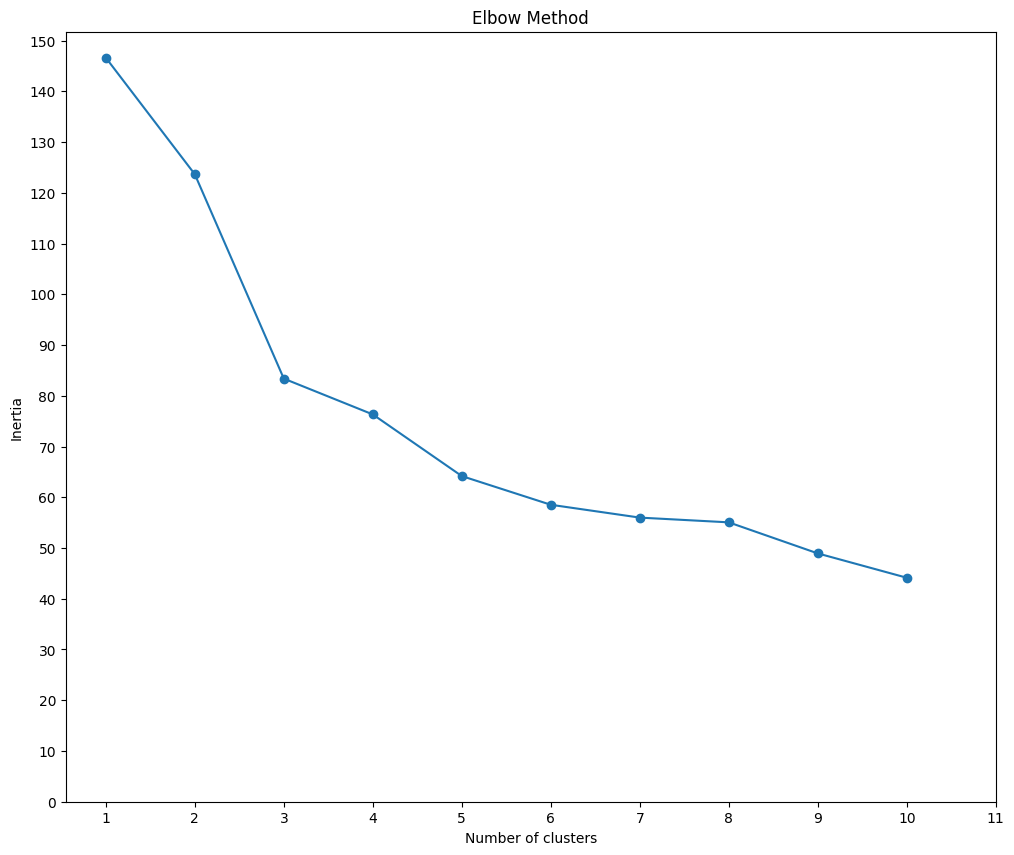

/home/zubec/dev/FipiBankClassification/utils/__main__.py:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html, features="html.parser")


Number of problems in clusters: {0: 73, 4: 41, 1: 32, 3: 28, 2: 14}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=B60549: Впишите правильный ответ.Миша заполнял таблицу истинности функции(¬x/\¬y)\/ (y≡z)\/w,но успел заполнить лишь фрагмент из трёх различных её строк, даже не указав, какому столбцу таблицы соответствует каждая из переменныхw,x,y,z.(¬x/\¬y)\/(y≡z)\/w10101000110Определите, какому столбцу таблицы соответствует каждая из переменныхw,x,y,z.В ответе напишите буквыw,x,y,zв том порядке, в котором идут соответствующие им столбцы (сначала буква, соответствующая первому столбцу; затем буква, соответствующая второму столбцу, и т.д.). Буквы в ответе пишите подряд, никаких разделителей между буквами ставить не нужно.Пример.Функция задана выражением ¬x\/y, зависящим от двух переменных, а фрагмент таблицы имеет следующий вид.¬x\/y010В этом случае первому столбцу соответствует переменнаяy, а второму столбцу–переменнаяx. В ответе с

In [61]:
clustered_df_2_15 = await print_and_get_theme_clustered_df("2.7", optimal_n_clusters=5)

Актуальность типов задач по номерам их кластеров:
- Актуальные (номер 2): $0, 2$
- Актуальные (номер 15): $1, 4$
- Не актуальные: $3$

In [62]:
cluster_id_to_exam_number_2 = create_cluster_id_to_exam_number_dict(
    2, actual_cluster_ids=[0, 2], outdated_cluster_ids=[]
)
cluster_id_to_exam_number_15 = create_cluster_id_to_exam_number_dict(
    15, actual_cluster_ids=[1, 4], outdated_cluster_ids=[3]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df_2_15,
    cluster_id_to_exam_number=cluster_id_to_exam_number_2 | cluster_id_to_exam_number_15,
)

Set "2" exam number to 73 problems.
Set "15" exam number to 32 problems.
Set "2" exam number to 14 problems.
Set "-15" exam number to 28 problems.
Set "15" exam number to 41 problems.


## Номера 17, 26

In [63]:
[informatics_content_codifier_theme_ids[exam_number - 1] for exam_number in [17, 26]]

['3.10', '3.10']

Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 267.67it/s]


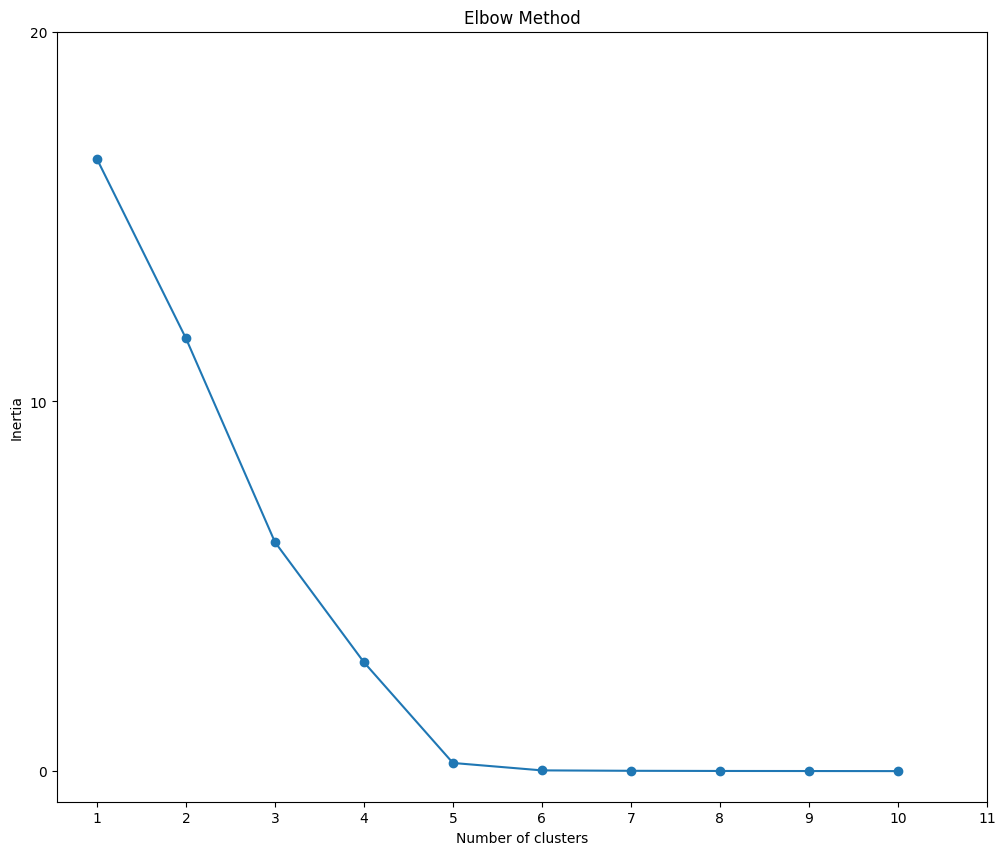

Number of problems in clusters: {2: 6, 0: 6, 1: 6, 3: 3, 4: 2}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=B1F57A: Впишите правильный ответ.Задание выполняется с использованием прилагаемыхфайлов.В магазине для упаковки подарков естьNкубических коробок. Самой интересной считается упаковка подарка по принципу матрёшки – подарок упаковывается в одну из коробок, та в свою очередь в другую коробку и т.д. Одну коробку можно поместить в другую, если длина её стороны хотя бы на 11 единиц меньше длины стороны другой коробки. Определите наибольшее количество коробок, которое можно использовать для упаковки одного подарка, и максимально возможную длину стороны самой маленькой коробки, где будет находиться подарок. Размер подарка позволяет поместить его в самую маленькую коробку.Входные данныеВ первой строке входного файла находится числоN– количество коробок в магазине (натуральное число, не превышающее 10 000). В следующихNстроках находя

In [64]:
clustered_df_17_26 = await print_and_get_theme_clustered_df("3.10", optimal_n_clusters=5)

Актуальность типов задач по номерам их кластеров:
- Актуальные (номер 2): $0, 1, 2, 3$
- Актуальные (номер 15): $4$

In [65]:
cluster_id_to_exam_number_17 = create_cluster_id_to_exam_number_dict(
    17, actual_cluster_ids=[0, 1, 2, 3], outdated_cluster_ids=[]
)
cluster_id_to_exam_number_26 = create_cluster_id_to_exam_number_dict(
    26, actual_cluster_ids=[4], outdated_cluster_ids=[]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df_17_26,
    cluster_id_to_exam_number=cluster_id_to_exam_number_17 | cluster_id_to_exam_number_26,
)

Set "17" exam number to 6 problems.
Set "17" exam number to 6 problems.
Set "17" exam number to 6 problems.
Set "17" exam number to 3 problems.
Set "26" exam number to 2 problems.


## Номера 19, 20 и 21

In [66]:
[informatics_content_codifier_theme_ids[exam_number - 1] for exam_number in [19, 20, 21]]

['2.15', '2.15', '2.15']

In [67]:
df_19_20_21 = await get_theme_df("2.15")
df_19_20_21

,problem_id,url,condition_html


В банке нет задач с таким кодом проверяемых элементов содержания кодификатора

# Остальные задачи, кодов проверяемых элементов содержания кодификатора которых нет в спецификаторе на 2024 год

In [68]:
df = pd.DataFrame(
    data=await get_problems_by_exam_number(exam_number=None),
    columns=["problem_id", "url", "condition_html"],
)
df

,problem_id,url,condition_html
0,76254F,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q76254F""> \t <div i..."
1,52574F,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q52574F""> \t <div i..."
2,0BF306,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q0BF306""> \t <div i..."
3,178B0E,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q178B0E""> \t <div i..."
4,36C506,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q36C506""> \t <div i..."
...,...,...,...
159,89926C,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q89926C""> \t <div i..."
160,4A068F,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q4A068F""> \t <div i..."
161,D8D382,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""qD8D382""> \t <div i..."
162,634E85,https://ege.fipi.ru/bank/questions.php?search=...,"<div class=""qblock"" id=""q634E85""> \t <div i..."


Clustering progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 127.74it/s]


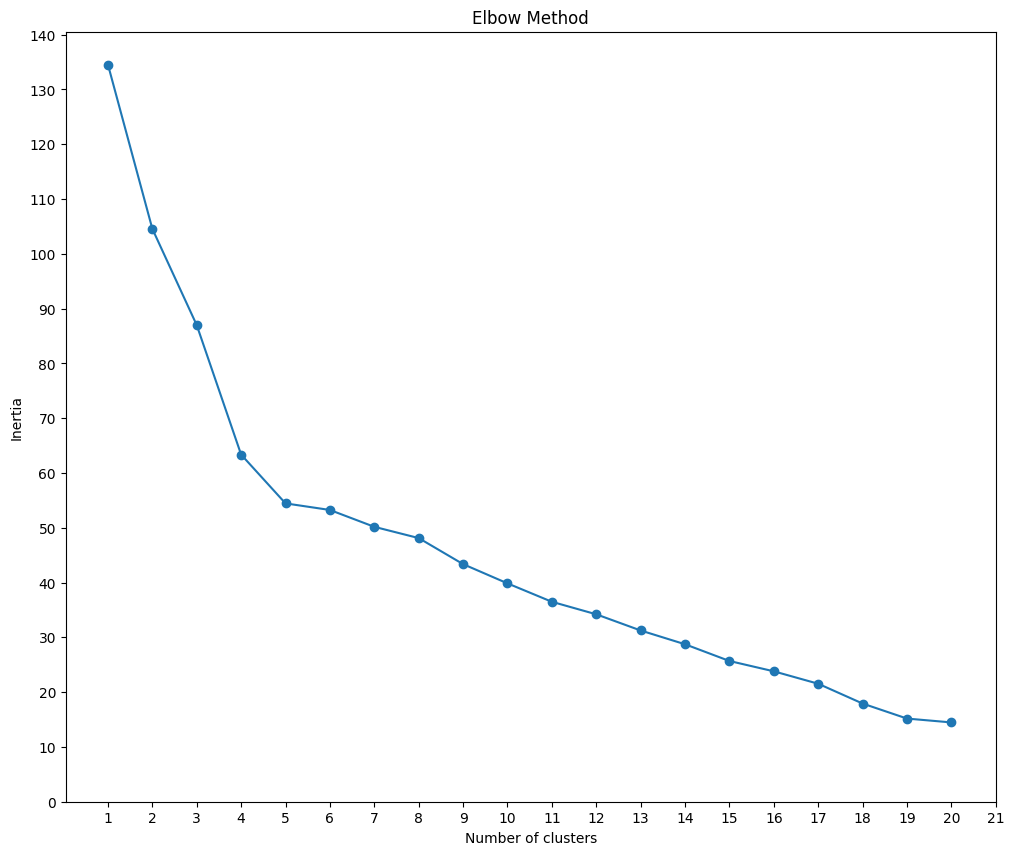

Number of problems in clusters: {2: 50, 1: 41, 3: 34, 0: 26, 4: 13}

Cluster 0:

https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=4A307F: Впишите правильный ответ.Скорость передачи данных черезADSL-соединение равна 256000бит/c. Передача файла через данное соединение заняла 3 минуты. Определите размер файла в килобайтах.Кб
https://ege.fipi.ru/bank/questions.php?search=1&proj=B9ACA5BBB2E19E434CD6BEC25284C67F&qid=0F4A18: Впишите правильный ответ.Документ (без упаковки) можно передать по каналу связи с одного компьютера на другой за 50 секунд.Если предварительно упаковать документ архиватором, передать упакованный документ, а потом распаковать на компьютере получателя, то общее время передачи (включая упаковку и распаковку) составит 30 секунд. Размер упакованного документа составляет 20% размера исходного документа.Сколько всего времени ушло на упаковку и распаковку данных, если считать, что время передачи файла пропорционально его размеру? Ответ за

/home/zubec/dev/FipiBankClassification/utils/__main__.py:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html, features="html.parser")


In [69]:
clustered_df_other = await print_and_get_theme_clustered_df(
    content_codifier_theme_id="", df=df, max_n_clusters=20, optimal_n_clusters=5
)

Актуальность типов задач по номерам их кластеров:
- Актуальные: $0, 1, 2, 3$
- Не актуальные (номер 7): $4$

In [70]:
cluster_id_to_exam_number_other = create_cluster_id_to_exam_number_dict(
    7, actual_cluster_ids=[4], outdated_cluster_ids=[0, 1, 2, 3]
)
await set_exam_number_from_clustered_df(
    clustered_df=clustered_df_other, cluster_id_to_exam_number=cluster_id_to_exam_number_other
)

Set "-7" exam number to 26 problems.
Set "-7" exam number to 41 problems.
Set "-7" exam number to 50 problems.
Set "-7" exam number to 34 problems.
Set "7" exam number to 13 problems.


Теперь все задания в локальной базе данных рассортированы по типам